# Case Study on Fast Food

In [1]:
!pip install kmodes

**Importing Libraries**

In [2]:
import numpy as np 
import pandas as pd 
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from kmodes.kmodes import KModes
import os
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

**Reading the data**

In [3]:
df = pd.read_csv('mcdonalds.csv')

**Analyzing rows and columns**

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


**Getting overall info from the data**

In [6]:
df.shape

(1453, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


**Getting statistical info from the columns of data**

In [8]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

**Arranging Age column into bins**

In [10]:
df['age_bin'] = pd.cut(df['Age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
df  = df.drop('Age',axis = 1)

In [11]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender,age_bin
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,Female,60-70
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,Every three months,Female,50-60
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,Every three months,Female,60-70
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,Once a week,Female,60-70
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,Once a month,Male,40-50


**Checking for null values**

In [12]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
VisitFrequency    0
Gender            0
age_bin           0
dtype: int64

**Checking the content in the columns**

In [13]:
for i in df.columns:
    print("column name :",i)
    print("No. of column :",len(df[i].unique()))
    print(df[i].unique())

column name : yummy
No. of column : 2
['No' 'Yes']
column name : convenient
No. of column : 2
['Yes' 'No']
column name : spicy
No. of column : 2
['No' 'Yes']
column name : fattening
No. of column : 2
['Yes' 'No']
column name : greasy
No. of column : 2
['No' 'Yes']
column name : fast
No. of column : 2
['Yes' 'No']
column name : cheap
No. of column : 2
['Yes' 'No']
column name : tasty
No. of column : 2
['No' 'Yes']
column name : expensive
No. of column : 2
['Yes' 'No']
column name : healthy
No. of column : 2
['No' 'Yes']
column name : disgusting
No. of column : 2
['No' 'Yes']
column name : Like
No. of column : 11
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
column name : VisitFrequency
No. of column : 6
['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
column name : Gender
No. of column : 2
['Female' 'Male']
column name : age_bin
No. of column : 7
['60-70', '50-60', '40-50', '20-30', '30-40', '0-20', '70-80']

## Data Visualization

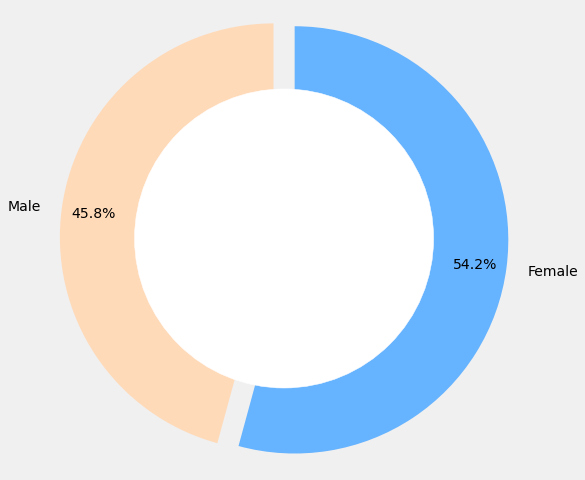

In [14]:
plt.style.use('fivethirtyeight')
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

## Model Building

**Data Preparation**

In [15]:
df_copy = df.copy()

In [16]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender,age_bin
0,0,1,0,1,0,1,1,0,1,0,0,6,0,0,5
1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,4
2,0,1,1,1,1,1,0,1,1,1,0,0,0,0,5
3,1,1,0,1,1,1,1,1,0,0,1,3,4,0,5
4,0,1,0,1,1,1,1,0,0,1,0,1,3,1,3


**Using K-Mode with "Cao" initialization**

In [17]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 205, cost: 6900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 258, cost: 6285.0
Run 1, iteration: 2/100, moves: 165, cost: 6194.0
Run 1, iteration: 3/100, moves: 162, cost: 6194.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 329, cost: 5888.0
Run 1, iteration: 2/100, moves: 212, cost: 5782.0
Run 1, iteration: 3/100, moves: 69, cost: 5782.0


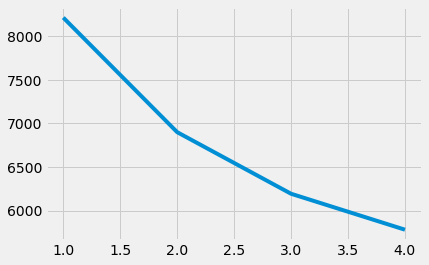

In [18]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [19]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 205, cost: 6900.0


In [20]:
fitClusters_cao

array([1, 0, 1, ..., 0, 0, 1], dtype=uint16)

In [21]:
df = df_copy.reset_index()

In [22]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [23]:
combinedDf.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender,age_bin,cluster_predicted
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,Every three months,Female,60-70,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,Every three months,Female,50-60,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,Every three months,Female,60-70,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,Once a week,Female,60-70,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,Once a month,Male,40-50,0


In [24]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [25]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 1 to 1451
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   yummy              1009 non-null   object  
 1   convenient         1009 non-null   object  
 2   spicy              1009 non-null   object  
 3   fattening          1009 non-null   object  
 4   greasy             1009 non-null   object  
 5   fast               1009 non-null   object  
 6   cheap              1009 non-null   object  
 7   tasty              1009 non-null   object  
 8   expensive          1009 non-null   object  
 9   healthy            1009 non-null   object  
 10  disgusting         1009 non-null   object  
 11  Like               1009 non-null   object  
 12  VisitFrequency     1009 non-null   object  
 13  Gender             1009 non-null   object  
 14  age_bin            1009 non-null   category
 15  cluster_predicted  1009 non-null   uint16  
dtypes: cat

In [26]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   yummy              444 non-null    object  
 1   convenient         444 non-null    object  
 2   spicy              444 non-null    object  
 3   fattening          444 non-null    object  
 4   greasy             444 non-null    object  
 5   fast               444 non-null    object  
 6   cheap              444 non-null    object  
 7   tasty              444 non-null    object  
 8   expensive          444 non-null    object  
 9   healthy            444 non-null    object  
 10  disgusting         444 non-null    object  
 11  Like               444 non-null    object  
 12  VisitFrequency     444 non-null    object  
 13  Gender             444 non-null    object  
 14  age_bin            444 non-null    category
 15  cluster_predicted  444 non-null    uint16  
dtypes: cate

**Checking clusters for each columns**

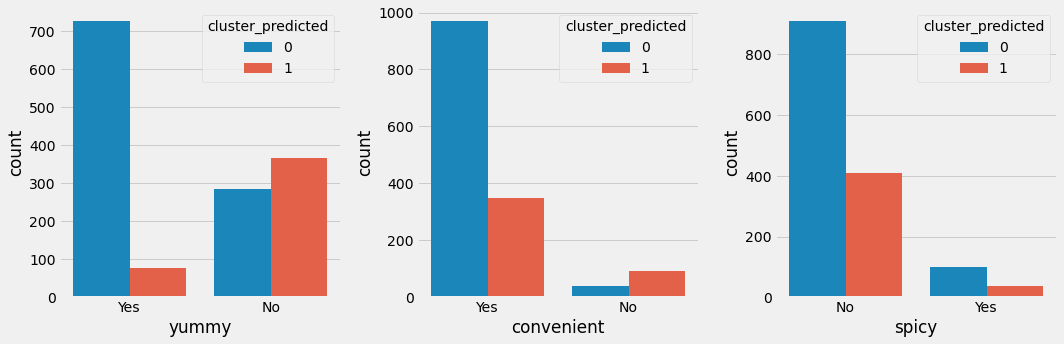

In [27]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['yummy'],order=combinedDf['yummy'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['convenient'],order=combinedDf['convenient'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['spicy'],order=combinedDf['spicy'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

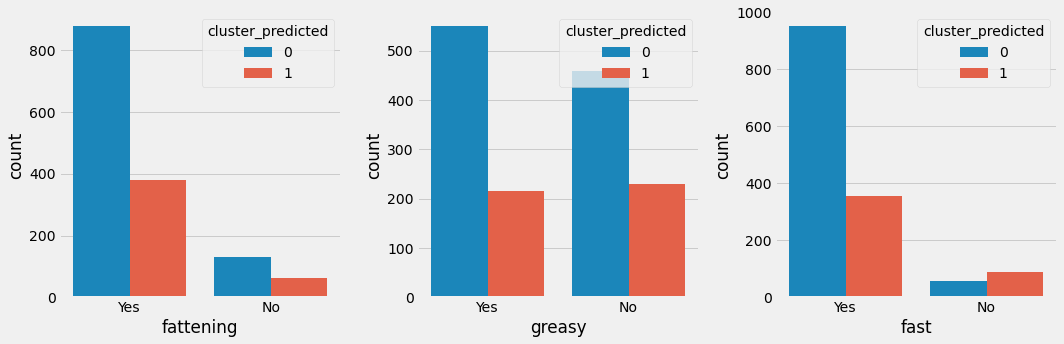

In [28]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['fattening'],order=combinedDf['fattening'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['greasy'],order=combinedDf['greasy'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['fast'],order=combinedDf['fast'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

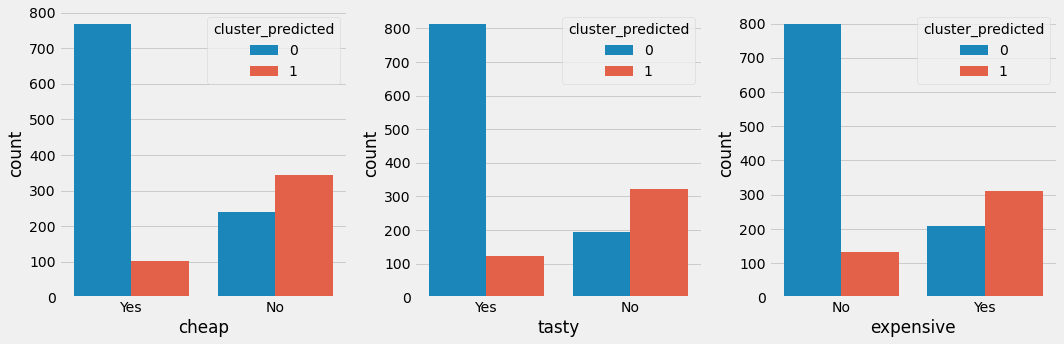

In [29]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['cheap'],order=combinedDf['cheap'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['tasty'],order=combinedDf['tasty'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['expensive'],order=combinedDf['expensive'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

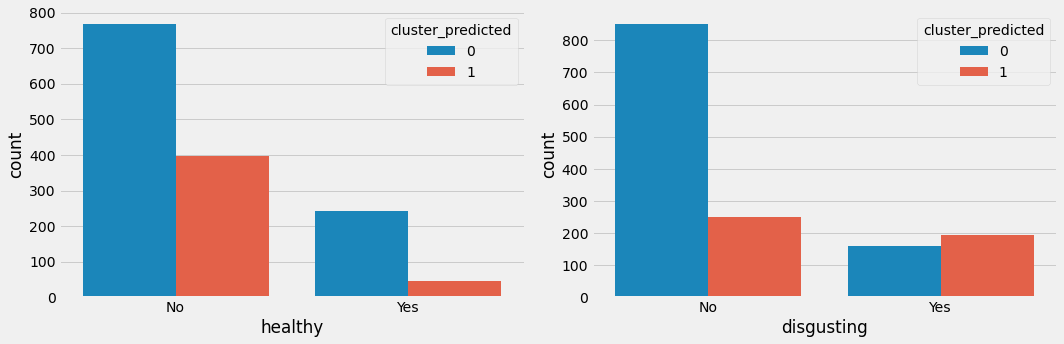

In [30]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['healthy'],order=combinedDf['healthy'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['disgusting'],order=combinedDf['disgusting'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

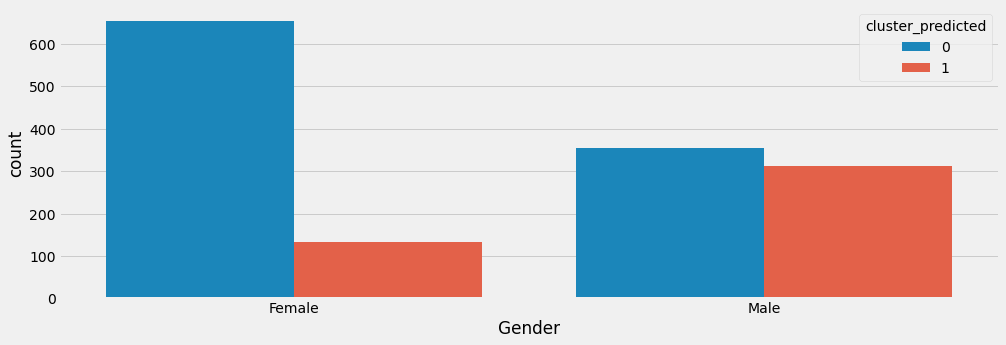

In [31]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Gender'],order=combinedDf['Gender'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

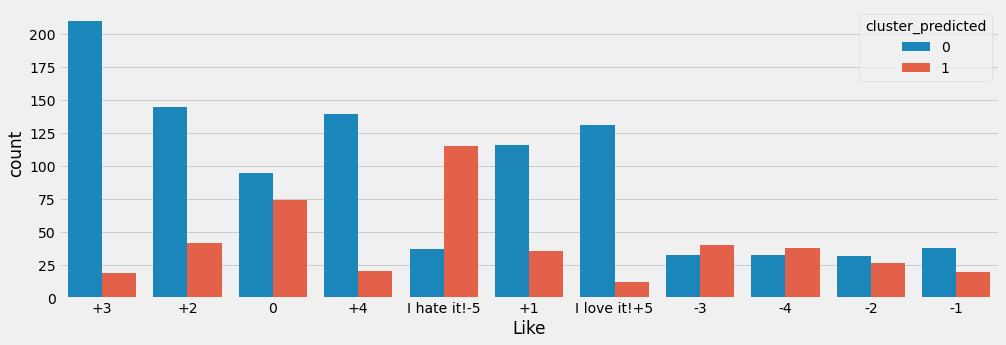

In [32]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Like'],order=combinedDf['Like'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

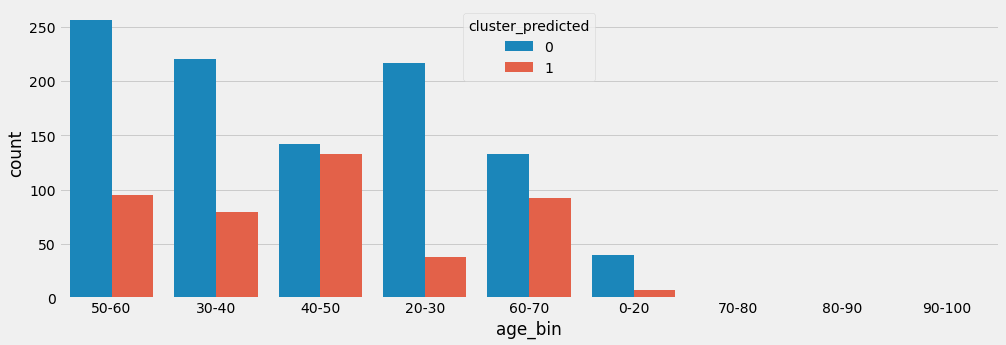

In [33]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

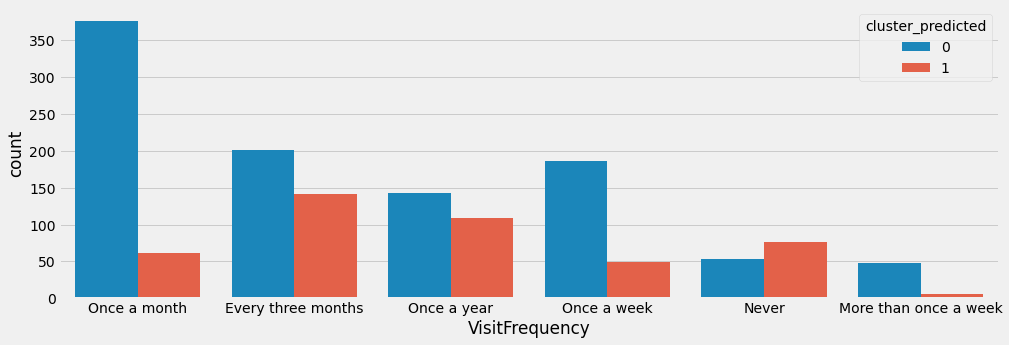

In [34]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['VisitFrequency'],order=combinedDf['VisitFrequency'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()